# **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

In [1]:
# para ver todo lo que hay instalado en el entorno virtual
# !pip freeze

In [2]:
# ! pip install tensorflow

Hola voy a ejecutar el comando ```!pip freeze``` para cotillear a Google Colab

## Tensorflow y la GPU

In [1]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
import sys

import tensorflow.keras
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print()
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.10.0

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [3]:
!nvidia-smi

Fri Nov 17 10:57:24 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.42                 Driver Version: 537.42       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   40C    P0              27W / 115W |    574MiB /  6144MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
print(tf.test.is_gpu_available())
print(tf.config.experimental.list_physical_devices())
print(tf.test.gpu_device_name())

True
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/device:GPU:0


## **Cargando el conjunto de datos**

In [5]:
# Importamos el dataset MNIST y cargamos los datos
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print('\n')
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)


(10000, 28, 28)
(10000,)


## **Inspeccionando el conjunto de datos**

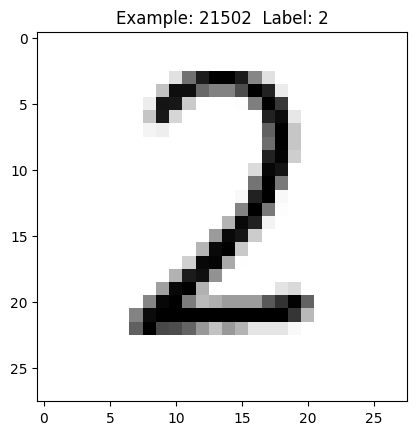

In [6]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:,:] 
  # Seleccionar el target num de mnist.train.labels
  label = y_train[num] 
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
# display_digit(np.random.randint(0, x_train.shape[0]))
# display_digit(np.random.randint(0, x_train.shape[0]))

## **Acondicionando el conjunto de datos**

In [7]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0                 #Cambio al rango 0-1 -> Disminuyo CC
y_train = to_categorical(y_train, num_classes=10)               #One-hot encoding para minimizar error
print(y_train.shape)
y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
print(y_tr.shape)
# print(y_tr[0])

(60000, 10)
(54000, 10)


In [8]:
print(y_tr[5214])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
print(y_tr[5214].argmax(axis=0))

4


## **Creando la topología de Red Neuronal (MLP) y entrenándola**

### modelo secuencial

In [10]:
# Voy a necesitar importar una serie de modulos
from tensorflow.keras.models import Sequential                  # un tipo de estructura. Se crea primero una instancia vacia, y se van añadiendo capas
from tensorflow.keras.layers import Dense, Flatten              # los dos tipos de capas que vamos a utilizar

# MLP con una única capa oculta de 512 neuronas
# codificar la topología 
model = Sequential()
model.add(Flatten()) 
model.add(Dense(512, input_shape=(28*28,), activation="relu"))  # la primera capa oculta, se le debe pasar el input_shape
model.add(Dense(10, activation="softmax"))                      #Capa salida -> Mismo número de neuronas que de clases objetivo

### modelo funcional

In [11]:
# from tensorflow.keras import Model
# from tensorflow.keras.layers import Input

# input_layer = Input(shape= (28, 28))
# input_layer = Flatten()(input_layer)
# hidden_layer1 = Dense(512, activation= 'relu')(input_layer)
# output_layer = Dense(10, activation= 'softmax')(hidden_layer1)

# # creando el modelo 
# model = Model(inputs= input_layer, outputs= output_layer)

In [12]:
#Traigamos nuestro optimizador
from tensorflow.keras.optimizers import SGD
# Ahora que tengo definida la arquitectura, la compilo
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"])

In [13]:
from time import time

In [14]:
#print(model.summary())

### MODELO SECUENCIAL

In [15]:
# Por fin podemos entrenar nuestra primera red neuronal
start = time()
print("[INFO]: Entrenando red neuronal...")

# El modelo guarda en cada epoca las perdidas y el acuracy en cada epoca
# el 422 son los steps es decir son batch sizes de 422 imagenes en cada epoca

H = model.fit(x_tr, y_tr,
              validation_data=(x_val, y_val),
              epochs=50, 
              batch_size=128)
end = time()

print(end-start)

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 5s 5ms/step - loss: 1.5029 - accuracy: 0.6469 - val_loss: 0.9850 - val_accuracy: 0.8052
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.7877 - accuracy: 0.8339 - val_loss: 0.6600 - val_accuracy: 0.8513
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.5901 - accuracy: 0.8626 - val_loss: 0.5380 - val_accuracy: 0.8737
Epoch 4/50
422/422 [==============================] - 1s 4ms/step - loss: 0.5028 - accuracy: 0.8762 - val_loss: 0.4735 - val_accuracy: 0.8822
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4529 - accuracy: 0.8841 - val_loss: 0.4326 - val_accuracy: 0.8903
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4198 - accuracy: 0.8905 - val_loss: 0.4049 - val_accuracy: 0.8942
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.3960 - accuracy: 0.8951 - val_loss: 0

### MODELO FUNCIONAL

In [65]:
# from keras.models import Model

# # definir la entrada
# input_layer = Input(shape= (28, 28))
# # Capa de aplanamiento
# x = Flatten()(input_layer)
# x = Dense(512, activation= 'relu')(x)
# output_layer = Dense(10, activation= 'softmax')(x)

# # crear el modelo
# model = Model(inputs= input_layer, outputs= output_layer)

## **LEARNING CURVES ---> Observando el proceso de entrenamiento para tomar decisiones**

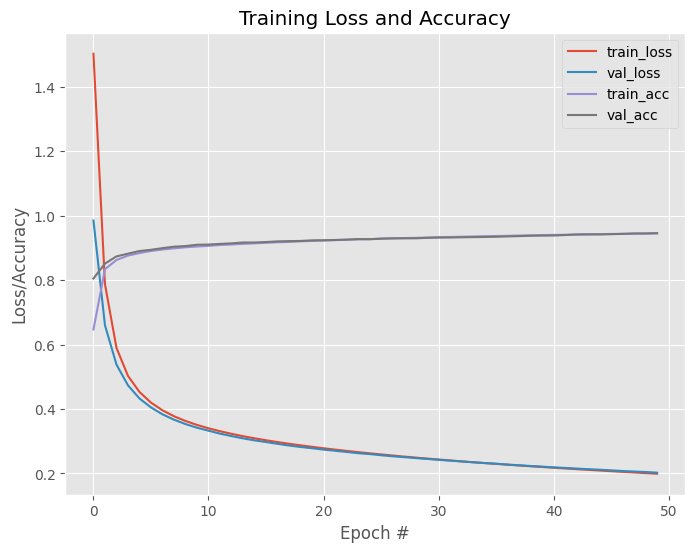

In [16]:
# Muestro gráfica de accuracy y losses
# esto es una muy buena grafica
plt.style.use("ggplot")
plt.figure(figsize= (8,6))
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## **Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [17]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=128)
print(y_te[0])
print(predictions[0])

# sacamos las métricas para cada clase
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))   # argmax es para que nos diga la etiqueta, ya que esta en OHE

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 3ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[5.3399235e-05 2.7952217e-07 4.1948748e-04 1.9751727e-03 2.4024509e-06
 5.3482257e-05 7.7741404e-08 9.9715543e-01 2.3557330e-05 3.1664665e-04]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.95      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.93      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95 

In [18]:
print(f'La predicción: {predictions[0].argmax(axis= 0)}')
print(f'La etiqueta real: {y_te[0].argmax(axis= 0)}')

La predicción: 7
La etiqueta real: 7


--------------------------------------------------------------------------

# **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

## **Cargando el conjunto de datos**

In [19]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words= WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [20]:
print(reuters.__dict__)

{'__name__': 'keras.api._v2.keras.datasets.reuters', '__doc__': 'Reuters topic classification dataset.\n', '__package__': 'keras.api._v2.keras.datasets.reuters', '__loader__': <_frozen_importlib_external.SourceFileLoader object at 0x0000029547F7D0D0>, '__spec__': ModuleSpec(name='keras.api._v2.keras.datasets.reuters', loader=<_frozen_importlib_external.SourceFileLoader object at 0x0000029547F7D0D0>, origin='c:\\Users\\plane\\OneDrive\\Escritorio\\COMPUTING SCIENCE\\MASTER Inteligencia artificial\\venv\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\reuters\\__init__.py', submodule_search_locations=['c:\\Users\\plane\\OneDrive\\Escritorio\\COMPUTING SCIENCE\\MASTER Inteligencia artificial\\venv\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\reuters']), '__path__': ['c:\\Users\\plane\\OneDrive\\Escritorio\\COMPUTING SCIENCE\\MASTER Inteligencia artificial\\venv\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\reuters'], '__file__': 'c:\\Users\\plane\\OneDrive\\Escrit

In [21]:
print(dir(reuters))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'get_word_index', 'load_data']


## **Inspeccionando el conjunto de datos**

In [22]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()               # para cada indice devuelve la palabra dada
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5248]]
)
decoded

'? ? oil corp said it has completed a ? well on its ? ? in jefferson davis ? la which is currently producing at a rate of 1 1 mln cubic feet of gas and 40 barrels of condensate daily the company said it has a 20 pct working interest in the well which is flowing from lower ? ? sand ? between 10 104 and 10 110 feet additional ? but possibly productive zones exist behind the pipe it added it said the remaining owners are privately held petroleum companies reuter 3'

In [23]:
print(word_index)
print(training_data)

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

## **Acondicionando el conjunto de datos**

In [24]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números 
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [25]:
# Convertimos nuestras palabras a números
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [26]:
print(x_test[3])

[0. 1. 1. ... 0. 0. 0.]


In [27]:
# Convertimos nuestros labels (categoría reseña) a one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(training_labels)
y_test = to_categorical(testing_labels)
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [28]:
print(y_test[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## **Creando la topología de Red Neuronal (MLP) y entrenándola**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Vamos a codificar la topología de nuestro MLP
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(WORD_LIMIT,)))   # el input_shape, de la misma longitud que la cantidad de palabras       
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))                           # clasificación multiclase num_classes, son 46 clases por lo tanto 46 neuronas

In [30]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [31]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train,y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 6ms/step - loss: 1.4909 - accuracy: 0.6873 - val_loss: 1.0526 - val_accuracy: 0.7590
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.5777 - accuracy: 0.8745 - val_loss: 0.8910 - val_accuracy: 0.8041
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 0.2790 - accuracy: 0.9449 - val_loss: 0.8929 - val_accuracy: 0.8052
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1998 - accuracy: 0.9538 - val_loss: 0.9999 - val_accuracy: 0.7869
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1607 - accuracy: 0.9562 - val_loss: 0.9591 - val_accuracy: 0.8013
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.1409 - accuracy: 0.9578 - val_loss: 1.0119 - val_accuracy: 0.7974
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1356 - accuracy: 0.9569 - val_loss: 1.0059 - val_accuracy: 0.7908
Epoch 

## **Observando el proceso de entrenamiento para tomar decisiones**

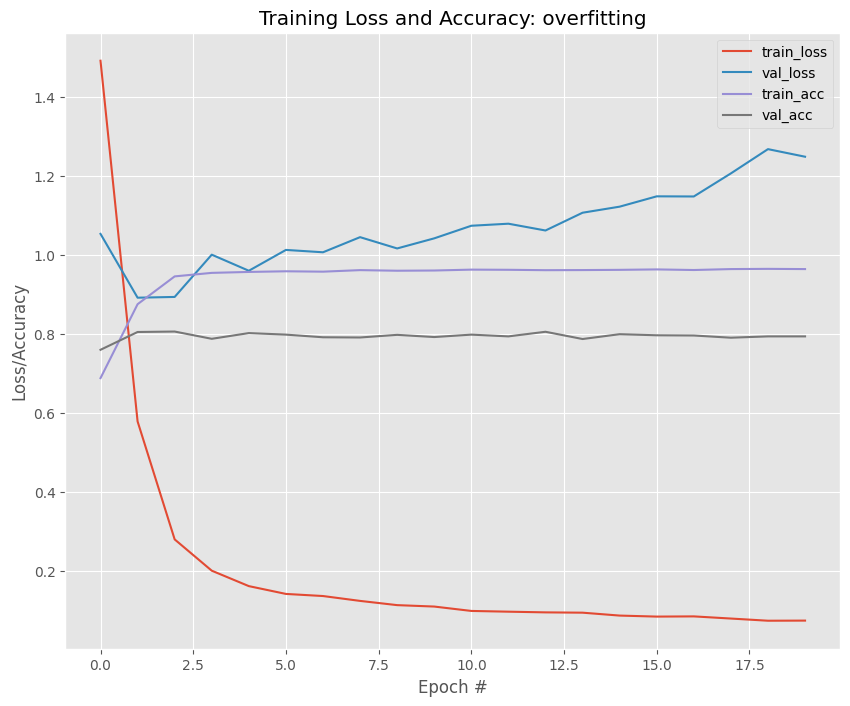

In [32]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure(figsize= (10,8))
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy: overfitting")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## **Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [33]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 5ms/step - loss: 1.3138 - accuracy: 0.7863
Loss 1.3137718439102173, accuracy 0.7862867116928101


# **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

## **Weight regularization L1/L2**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Vamos a codificar la topología de nuestro MLP
model_reg = Sequential()
model_reg.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(WORD_LIMIT,)))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [18]:
# Ahora que tengo definida la arquitectura, la compilo
model_reg.compile(optimizer='adam',
                  loss='categorical_crossentropy',                     # ideal para clasificacion multiclase
                  metrics=['accuracy'])

In [19]:
# A entrenar nuestra red neuronal sea dicho!
H = model_reg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 2.4232 - accuracy: 0.6480 - val_loss: 1.8255 - val_accuracy: 0.7168
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 1.7092 - accuracy: 0.7346 - val_loss: 1.7002 - val_accuracy: 0.7301
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 1.6071 - accuracy: 0.7546 - val_loss: 1.6350 - val_accuracy: 0.7518
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 1.5389 - accuracy: 0.7701 - val_loss: 1.5965 - val_accuracy: 0.7579
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4924 - accuracy: 0.7740 - val_loss: 1.6208 - val_accuracy: 0.7401
Epoch 6/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4578 - accuracy: 0.7830 - val_loss: 1.5730 - val_accuracy: 0.7579
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4517 - accuracy: 0.7861 - val_loss: 1.5547 - val_accuracy: 0.7646
Epoch 

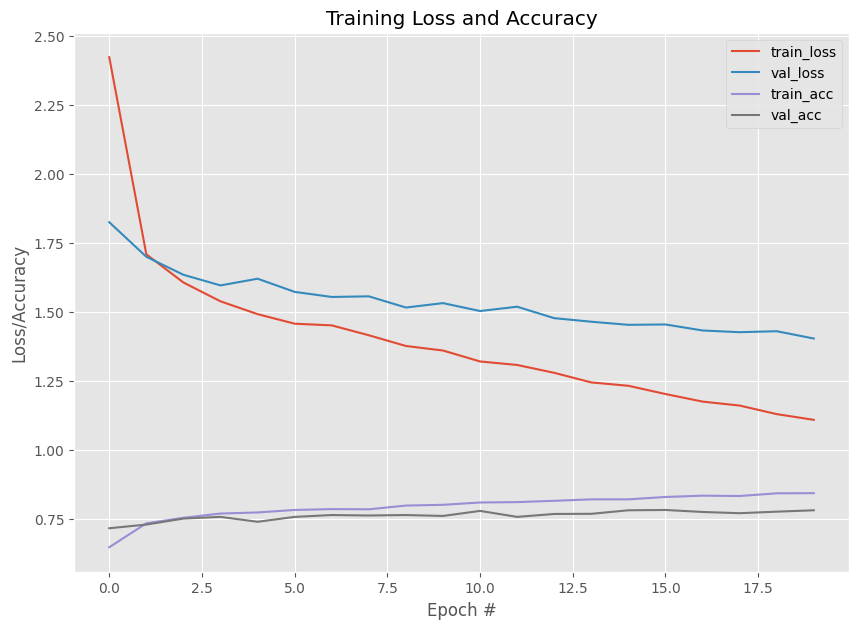

In [20]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure(figsize= (10, 7))
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [21]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_reg.predict(x_test)
loss, accuracy = model_reg.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.4437 - accuracy: 0.7703
Loss 1.443746566772461, accuracy 0.7702582478523254


## **Dropout**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Vamos a codificar la topología de nuestro MLP
model_drop = Sequential()
model_drop.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.5))                                           # este valor es el dropout rate    
model_drop.add(Dense(64,activation='relu'))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(46,activation='softmax'))                         # Reparto de la unidad de probabilidad entre num_classes

In [23]:
# Ahora que tengo definida la arquitectura, la compilo
model_drop.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [24]:
# A entrenar nuestra red neuronal sea dicho!
H = model_drop.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 6ms/step - loss: 1.9742 - accuracy: 0.5421 - val_loss: 1.2557 - val_accuracy: 0.7134
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 1.2419 - accuracy: 0.7044 - val_loss: 1.0851 - val_accuracy: 0.7557
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 0.9968 - accuracy: 0.7596 - val_loss: 1.0099 - val_accuracy: 0.7735
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 0.8464 - accuracy: 0.7910 - val_loss: 0.9800 - val_accuracy: 0.7924
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 0.7342 - accuracy: 0.8185 - val_loss: 0.9600 - val_accuracy: 0.7980
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.6339 - accuracy: 0.8411 - val_loss: 0.9877 - val_accuracy: 0.7991
Epoch 7/20
225/225 [==============================] - 1s 6ms/step - loss: 0.5528 - accuracy: 0.8594 - val_loss: 0.9702 - val_accuracy: 0.8019
Epoch 

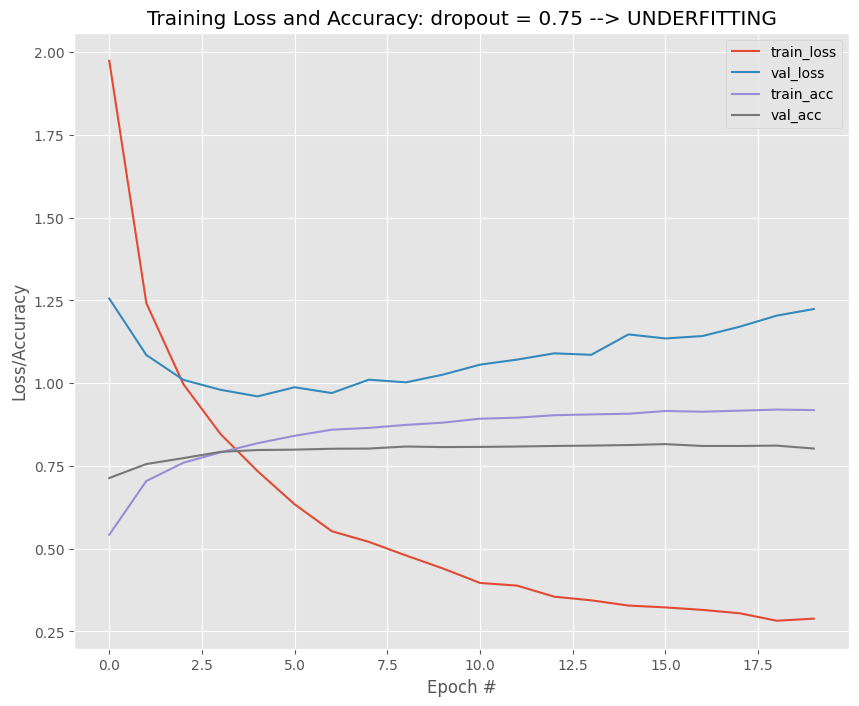

In [25]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure(figsize= (10, 8))
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy: dropout = 0.75 --> UNDERFITTING" )
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# ¿Y si desconectamos mayor/menor porcentaje de neuronas?

In [26]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_drop.predict(x_test)
loss, accuracy = model_drop.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 5ms/step - loss: 1.3744 - accuracy: 0.8050
Loss 1.3744406700134277, accuracy 0.8049866557121277


## **Batch Normalization**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential()
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
model_bn.add(BatchNormalization())              # se normaliza las activaciones
model_bn.add(Dropout(0.6))
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.6))
model_bn.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [28]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [29]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 8ms/step - loss: 2.4775 - accuracy: 0.4913 - val_loss: 1.5730 - val_accuracy: 0.6889
Epoch 2/20
225/225 [==============================] - 2s 7ms/step - loss: 1.4893 - accuracy: 0.6749 - val_loss: 1.1516 - val_accuracy: 0.7468
Epoch 3/20
225/225 [==============================] - 2s 9ms/step - loss: 1.2555 - accuracy: 0.7130 - val_loss: 1.0746 - val_accuracy: 0.7568
Epoch 4/20
225/225 [==============================] - 2s 8ms/step - loss: 1.0830 - accuracy: 0.7493 - val_loss: 1.0132 - val_accuracy: 0.7746
Epoch 5/20
225/225 [==============================] - 2s 9ms/step - loss: 0.9613 - accuracy: 0.7736 - val_loss: 0.9883 - val_accuracy: 0.7796
Epoch 6/20
225/225 [==============================] - 2s 8ms/step - loss: 0.8450 - accuracy: 0.7990 - val_loss: 0.9693 - val_accuracy: 0.7896
Epoch 7/20
225/225 [==============================] - 2s 8ms/step - loss: 0.7855 - accuracy: 0.8136 - val_loss: 0.9594 - val_accuracy: 0.7947
Epoch 

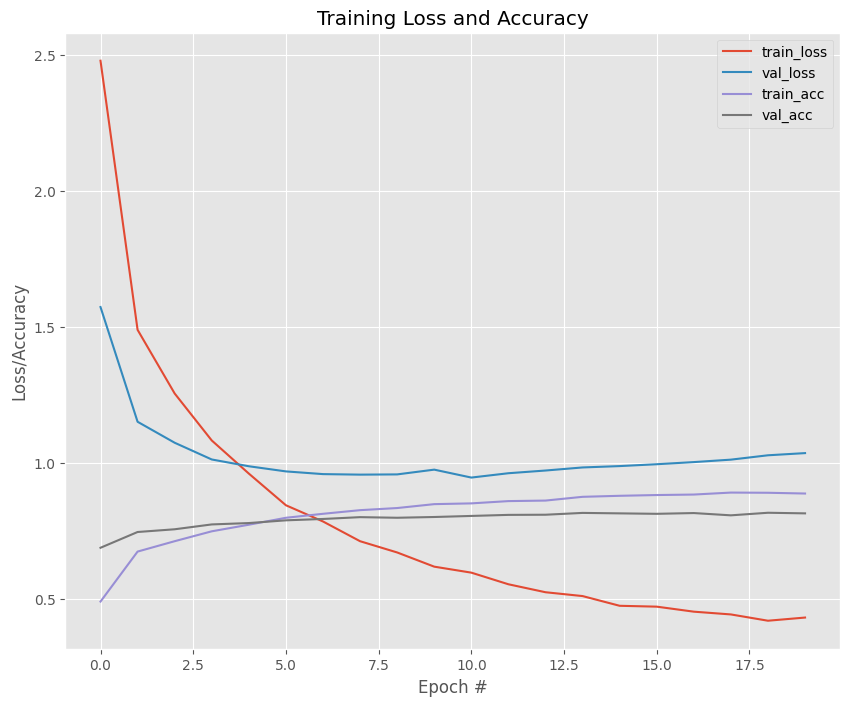

In [30]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure(figsize= (10, 8))
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [31]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_bn.predict(x_test)
loss, accuracy = model_bn.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.8014
Loss 1.097265601158142, accuracy 0.8014247417449951
